In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Defining functions using the transfer matrix method to generate transmission spectra, first for scatterers of equal strength = 1/2, then for scatterers of any strength

In [2]:
h_bar = 1.0  # Planck's constant over 2π
m = 1.0  # Mass of the electron

def Mdelta(k, strength):

    L = strength * m

    Mdelta = np.array([ [0. + 0j, 0.+0j], [0.+0j, 0.+0j]])

    b = 2

    Mdelta[0,0] = 1.0 + L /(b*1j*k)
    Mdelta[0,1] = + L /(b*1j*k)
    Mdelta[1,0] = - L /(b*1j*k)
    Mdelta[1,1] = 1.0 - L/(b*1j*k) #holds if h_bar = sqrt(2) m = alpha = 1

    return Mdelta


def M0(k, L):

    M0 = np.array([ [0. + 0j, 0.+0j], [0.+0j, 0.+0j]])

    M0[0,0] = np.exp(+1j*k*L)
    M0[0,1] = 0.0
    M0[1,0] = 0.0
    M0[1,1] = np.exp(-1j*k*L)

    return M0

def transfer_matrix_delta_potential(x, heights, k):
    M = np.identity(2, dtype=complex)  # Start with the identity matrix

    # Ensure x and heights are sorted in the same order
    indices = np.argsort(x)
    x_sorted = np.array(x)[indices]
    heights_sorted = np.array(heights)[indices]

    # Build the transfer matrix
    for i in range(len(x_sorted)):
        if i > 0:  # For all but the first potential, include free space evolution
            M = np.matmul(M0(k, x_sorted[i] - x_sorted[i-1]), M)
        M = np.matmul(Mdelta(k, heights_sorted[i]), M)

    M = np.identity(2, dtype=complex)

    for i in range(len(x)-1, -1, -1): #for each scatterer
        M = np.matmul(Mdelta(k, heights_sorted[i]), M) 
        if len(x)>1:
            M = np.matmul(M0(k, x[i]-x[i-1]), M) 

    return M

def trans_delta_L(x, heights, E):
    T = np.zeros(len(E))

    for i, energy in enumerate(E):
        #k = np.sqrt( 2 * m * energy) / h_bar
        k = np.sqrt( m * energy) / h_bar

        # Calculate the transfer matrix for given energy and delta potentials
        s = transfer_matrix_delta_potential(x, heights, k) # throwing error
        
        # Compute transmission coefficient
        T[i] = 1.0 / (np.abs(s[0, 0]))**2

    return T

In [3]:
h_bar = 1.0  # Planck's constant over 2π
m = 1.0    # Mass of the electron
strength = 1

def Mdelta_p(k):

    Mdelta = np.array([ [0. + 0j, 0.+0j], [0.+0j, 0.+0j]])

    b = 2
    L = strength * m

    Mdelta[0,0] = 1.0 + L/(b*1j*k)
    Mdelta[0,1] = +L/(b*1j*k)
    Mdelta[1,0] = -L/(b*1j*k)
    Mdelta[1,1] = 1.0 - L/(b*1j*k) #holds if h_bar = sqrt(2) m = alpha = 1

    return Mdelta


def M0_p(k, L):

    M0 = np.array([ [0. + 0j, 0.+0j], [0.+0j, 0.+0j]])

    M0[0,0] = np.exp(+1j*k*L)
    M0[0,1] = 0.0
    M0[1,0] = 0.0
    M0[1,1] = np.exp(-1j*k*L)

    return M0


def transfer_matrix_delta_potential_p(x, k):
    M = np.identity(2)

    for i in range(len(x)-1, -1, -1): #for each scatterer
        M = np.matmul(Mdelta_p(k), M) 
        if len(x)>1:
            M = np.matmul(M0_p(k, x[i]-x[i-1]), M) 

    return M


def trans_delta(x, E):
    x = np.sort(x)
    
    T = np.zeros(len(E))

    for i in range(len(E)):
        k = np.sqrt(m * E[i] ) / h_bar

        s = transfer_matrix_delta_potential_p(x, k)
        
        #T[i] = 1.0/(np.abs(s[0, 0]))**2
        T[i] = 1.0/(np.abs(s[1, 1]))**2

    return T

Verifying that both transmission spectrum generator functions are equivalent and reasonable

Text(0, 0.5, '$\\langle T(E) \\rangle$')

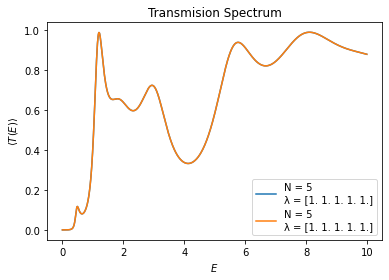

In [62]:
E = np.arange(0.001, 10, 0.01)
L = 50

x = [0.5, 2, 2.2, 4, 7]
strengths = np.ones(len(x))

T_E = trans_delta_L(x, strengths, E)

plt.plot(E, T_E, label = (f"N = {len(strengths)} \n" f"λ = {strengths}"))

T_E = trans_delta(x, E)
plt.plot(E, T_E, label = (f"N = {len(strengths)} \n" f"λ = {strengths}"))

plt.legend()
plt.title("Transmision Spectrum")
plt.xlabel("$E$")
plt.ylabel(r"$\langle T(E) \rangle$")

Determining the neccessary number of transmission spectra that need to be averaged to find smoothe configurational average (CA) curves

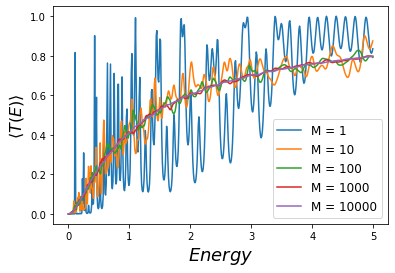

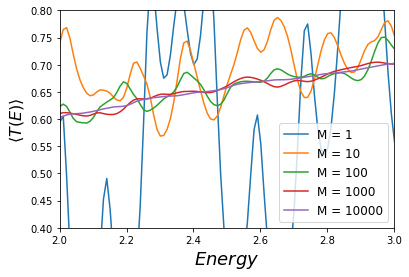

In [185]:
E = np.arange(0.001, 5, 0.01)
L = 100
N = 5

n_configs_list = [1, 10, 100, 1000, 10000]

for n_configs in n_configs_list:

    ca_T = np.genfromtxt(f'ca_T_N_5_n_configs_{n_configs}')
    plt.plot(E, ca_T, label = f"M = {n_configs}")

plt.xlabel("$Energy$", fontsize = 18)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)
plt.legend(fontsize = 12, loc='lower right')

plt.savefig('fig_dd_CA_with_carying_M_zoomed_out.png', dpi = 1000)

plt.show()

for n_configs in n_configs_list:

    ca_T = np.genfromtxt(f'ca_T_N_5_n_configs_{n_configs}')
    plt.plot(E, ca_T, label = f"M = {n_configs}")

plt.xlabel("$Energy$", fontsize = 18)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)
plt.xlim(2, 3)
plt.ylim(0.4, 0.8)

plt.savefig('fig_dd_CA_with_carying_M_zoomed_in.png', dpi = 1000)

plt.legend(fontsize = 12, loc='lower right')

Hence finding the CA curves for $\lambda = 1/2$ 

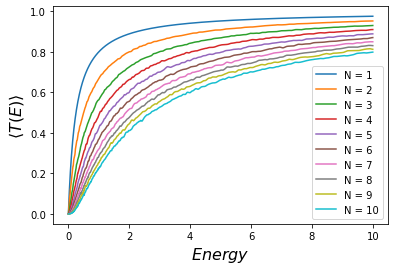

In [136]:
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
E = np.arange(0.001, 10, 0.005)
n_configs = 10000
strength = 1

for N in N_list:
    ca_T = np.genfromtxt(f'ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run')
    plt.plot(E, ca_T, label = f"N = {N}")

plt.legend()

plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)

plt.savefig('fig_dd_curves_N_impurities_n_configs_10000.png', dpi = 1000)

Hence fitting transmission spectra to the CA curves and measuring the accuracy with which this can predict $N_{true}$

5.001 = 5
0.498619971444488
0.3480473619888063
0.2396065410050392
0.17815409542630722
0.12759904112189663
0.09354895604085782
0.06551068806435749
0.047640117270986194
0.03455392347889934
0.02523475988501774


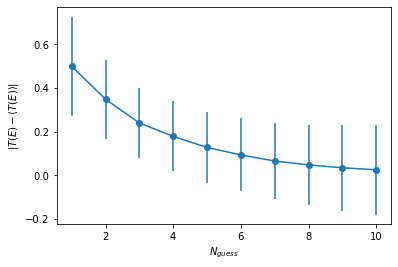

In [175]:
#for a single energy value
E = np.arange(0.001, 10, 0.005)

print(E[1000], "= 5")

# strength_true = 1
# N_true = 4

new_error_list = []

for N in N_list:
    ca_E = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run")[1000]

    error = (T_E[1000] - ca_E)**2

    print(error)

    new_error_list.append(error)

plt.scatter(N_list, new_error_list)

error_configs = 10

error_list_list = []

for i in range(error_configs):

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E)

    an_error_list = []

    for N in N_list:
        ca_E = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run")[1000]
        error = np.abs(T_E[1000] - ca_E)
        
        an_error_list.append(error)

    error_list_list.append(an_error_list)

min_error_index = np.argmin(an_error_list)

standard_deviations = []

for N in range(len(N_list)):
    errors_for_this_N = []
    for i in range(error_configs):
        error_value = error_list_list[i][N]
        errors_for_this_N.append(error_value)
    standard_deviations.append(np.std(errors_for_this_N))

standard_error = standard_deviations / np.sqrt(error_configs)

plt.errorbar(N_list, new_error_list, standard_deviations)

plt.xlabel("$N_{guess}$")
plt.ylabel(r"$|T(E) - \langle T(E) \rangle|$")

plt.savefig('fig_error_function_at_single_energy_a_5_n_configs_{n_configs}_error_configs_{error_configs}_eeor bars_sdev.png', dpi = 1000)


Error Function Minimumised at N =  4


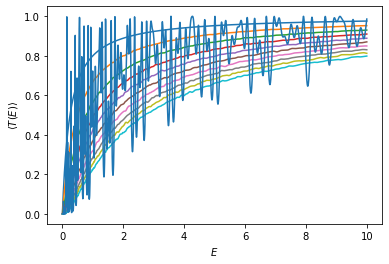

In [154]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

strengths = strength_true*np.ones(N)
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


x = L*np.random.rand(N_true)
T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

for N in N_list: #for each guess of what N might be

    ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run") # our curve for the N_guess for the number of configurations
    error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
    error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

    plt.plot(E, ca_T_curve)

plt.plot(E, T_E, label = "T(E) for N = {N_true}")

index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

print("Error Function Minimumised at N = ", N_guess)

plt.xlabel("$E$")
plt.ylabel(r"$\langle T(E) \rangle$")

plt.legend
plt.show()


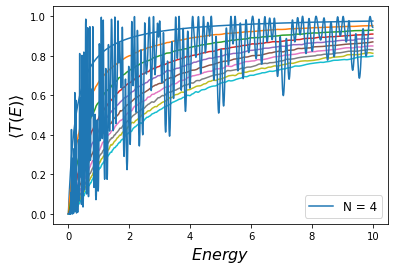

In [149]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

strengths = strength_true*np.ones(N_true)
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


x = L*np.random.rand(N_true)
T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

for N in N_list: #for each guess of what N might be

    ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run") # our curve for the N_guess for the number of configurations
    error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
    error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

    plt.plot(E, ca_T_curve)

plt.plot(E, T_E, label = f"N = {N_true}")
plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)
plt.legend(fontsize = 12, loc='lower right')

plt.savefig('fig_dd_transmission_spectrum_on_CA_curves_N_4_lambda_1_legend.png', dpi = 1000)

Generating $\chi(N)$ and errorbars

Error Function Minimumised at N =  4


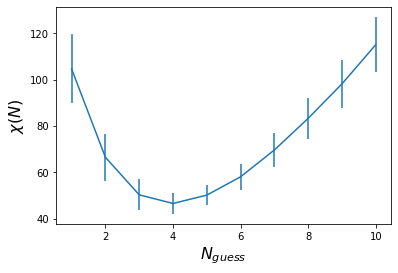

In [144]:
index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

print("Error Function Minimumised at N = ", N_guess)

plt.show()

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

error_configs = 100

error_list_list = []

for i in range(error_configs):

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E)

    error_list = []

    for N in N_list:
        ca_T = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run")
        error = sum((T_E - ca_T)**2)
        
        error_list.append(error)

    error_list_list.append(error_list)

min_error_index = np.argmin(error_list)

standard_deviations = []

for N in range(len(N_list)):
    errors_for_this_N = []
    for i in range(error_configs):
        error_value = error_list_list[i][N]
        errors_for_this_N.append(error_value)
    standard_deviations.append(np.std(errors_for_this_N))

np.savetxt(f'standard_deviations_chi_N_{N}_lambda{strength_true}_error_configs_{error_configs}', standard_deviations)

standard_error = standard_deviations# / np.sqrt(error_configs)

plt.errorbar(N_list, error_list, standard_error)
plt.xlabel("$N_{guess}$", fontsize = 16)
plt.ylabel(r"$\chi(N)$", fontsize = 16)

plt.savefig('fig_dd_chi_s_dev_sdev_errorbars_N_4_lambda_1_yax_fix.png', dpi = 1000)

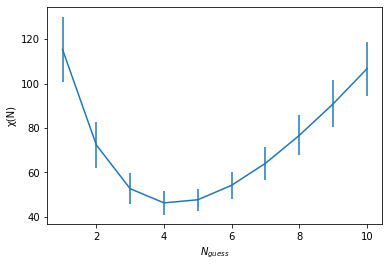

In [138]:


standard_error = standard_deviations# / np.sqrt(error_configs)

plt.errorbar(N_list, error_list, standard_error)
plt.xlabel("$N_{guess}$")
plt.ylabel("χ(N)")

plt.savefig('fig_chi_s_dev_sdev_errorbars_N_4_lambda_1_yax_fix.png', dpi = 1000)

In [139]:
standard_deviations = np.genfromtxt(f'standard_deviations_chi_N_{N}_lambda{strength_true}_error_configs_{error_configs}')


Analysing the % error in $N_{guess}$ vs. $N_{true}$ averaged over 1000 parent configurations, for $\lambda = 1$

In [140]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

n_spectra = 1000
n_configs = 10000

alpha_list = [] #list of average errors of 100 spectra for each number of configurations used to calculate 
alpha_sdev_list = []

for N_true in N_list: #N_true

    strengths = strength_true*np.ones(N_true)

    alpha_array = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for i in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for N in N_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

        alpha = np.abs(N_guess - N_true) / N_true  # how different is the guess from N_true

        alpha_array[i] = alpha # saving this measure
        
    average_alpha = np.sum(alpha_array) / n_spectra # averaging over all spectra

    sdev_alpha = np.std(alpha_array)
    
    alpha_sdev_list.append(sdev_alpha)
    alpha_list.append(average_alpha) #saving this

np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_strength_{strength_true}_stdev_true_true", (N_list, alpha_list, alpha_sdev_list)) #how good it is at guessing N for any strength

KeyboardInterrupt: 

In [ ]:
plt.scatter(N_list, alpha_list, label = f'from av. over {n_configs} configurations')

np.savetxt(f'alpha_s_dev_list_n', alpha_sdev_list)

se_list = alpha_sdev_list / np.sqrt(n_spectra)
plt.errorbar(N_list, alpha_list, se_list)

print(alpha_sdev_list)
plt.xlabel("$N_{true}$")
plt.ylabel("$\alpha$")
#plt.title("% Error in $N_{guess}$ vs. $N_{true}$")
plt.savefig('fig_alpha_errorbars_N_lambda_1.png', dpi = 1000)

plt.show()

NameError: name 'alpha_list' is not defined

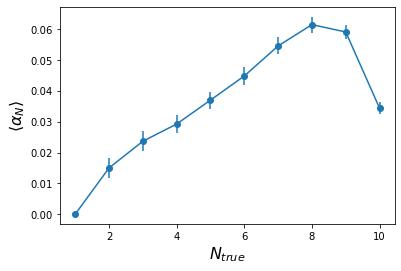

In [146]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list, alpha_list, alpha_sdev_list = np.genfromtxt(f'percent_error_with_N_true_n_configs_{n_configs}_strength_{strength_true}_stdev_true_true')

n_spectra = 1000 

se_list = alpha_sdev_list / np.sqrt(n_spectra)

plt.scatter(N_list, alpha_list)
plt.errorbar(N_list, alpha_list, se_list)

#print(alpha_sdev_list)
plt.xlabel("$N_{true}$", fontsize = 16)
plt.ylabel(r"$\langle\alpha_{N}\rangle$", fontsize = 16)
#plt.title("% Error in $N_{guess}$ vs. $N_{true}$")
plt.savefig('fig_dd_average_alpha_errorbars_N_lambda_1.png', dpi = 1000)

In [ ]:
##runme
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

n_spectra = 1000
n_configs_list = [1000, 100, 10, 1]

alpha_list = [] #list of average errors of 100 spectra for each number of configurations used to calculate 

for N_true in N_list: #N_true

    strengths = strength_true*np.ones(N_true)

    alpha_array = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for i in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for N in N_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

        alpha = np.abs(N_guess - N_true) / N_true  # how different is the guess from N_true

        alpha_array[i] = alpha # saving this measure
        
    average_alpha = np.sum(alpha_array) / n_spectra # averaging over all spectra

    alpha_list.append(average_alpha) #saving this

np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_strength_{strength_true}", (N_list, alpha_list)) #how good it is at guessing N for any strength


In [17]:
##runme
n_configs_list = [1, 10, 100, 1000, 10000]

for n_configs in n_configs_list:

    N_list, alpha_list = np.genfromtxt(f'percent_error_with_N_true_n_configs_{n_configs}_strength_1')

    plt.plot(N_list, alpha_list, label = f'from av. over {n_configs} configurations')
    plt.xlabel("N_true")
    plt.ylabel("$\alpha$")
    plt.title("% Error in $N_{guess}$ vs. $N_{true}$")

    plt.show()

FileNotFoundError: percent_error_with_N_true_n_configs_1_strength_1 not found.

Similarly, CA curves were generated for N = 6 for many different scatterer strengths

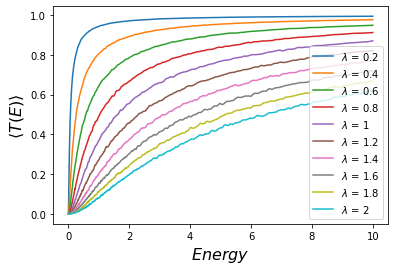

In [5]:
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

E = np.arange(0.001, 10, 0.005)
n_configs = 10000
N = 6

for strength in strength_list:
    ca_T = np.genfromtxt(f'ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run')
    plt.plot(E, ca_T, label = f"$\lambda$ = {strength}")

plt.legend()

plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)

plt.savefig(f'fig_dd_CA_L_N_{N_true}_legend.png', dpi = 1000)

And matching a transmission spectrum of unknown strength to one of these curves to determine $\lambda_{guess}$

Error Function Minimumised at $\lambda$ =  0.8


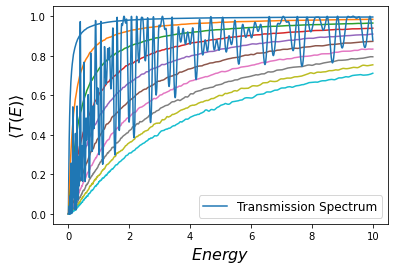

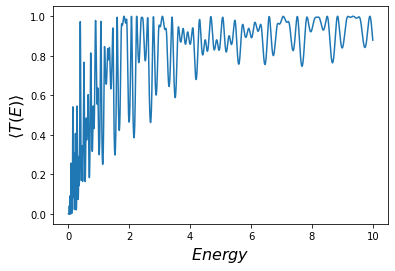

In [16]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 0.8
N_true = 4

strengths = strength_true*np.ones(N)
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

# N = 4
# strengths = [1.6, 1.6, 1.6, 1.6]


x_1 = [20, 40, 48, 78]

T_E_1 = trans_delta_L(x_1, strengths, E) #generating a random spectrum


x = L*np.random.rand(N_true)
T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

for strength in strength_list: #for each guess of what N might be

    ca_T_curve = np.genfromtxt(f"ca_T_N_{N_true}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
    error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
    error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

    plt.plot(E, ca_T_curve)

plt.plot(E, T_E, label = f"Transmission Spectrum")

index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

strength_guess = strength_list[index_of_n_scatterers] #hence, the guess for N

print(r"Error Function Minimumised at $\lambda$ = ", strength_guess)

plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)

plt.legend(fontsize = 12, loc='lower right')

plt.savefig(f'fig_ee_CA_L_N_{N_true}_with_T_E_0.8_legend.png', dpi = 1000)

plt.show()

plt.plot(E, T_E, label = f"Transmission Spectrum")
plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)
plt.savefig(f'fig_ee_L_N_{N_true}_with_T_E_0.8_legend.png', dpi = 1000)


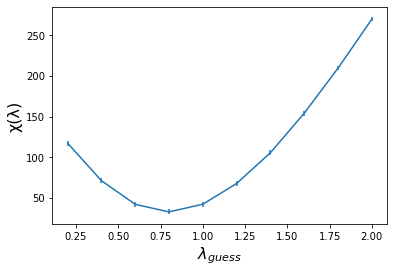

In [12]:
error_list_list = []

error_configs = 100

chi_sdev_list = []

N_list = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10]

for i in range(error_configs):

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E)

    new_error_list = []

    for strength in strength_list:
        ca_T = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run")
        error = sum((T_E - ca_T)**2)
        
        new_error_list.append(error)

    error_list_list.append(new_error_list)

    chi_sdev_list.append(np.std(new_error_list))

min_error_index = np.argmin(new_error_list)

standard_deviations = []

for strength in range(len(N_list)):
    errors_for_this_N = []
    for i in range(error_configs):
        error_value = error_list_list[i][strength]
        errors_for_this_N.append(error_value)
    standard_deviations.append(np.std(errors_for_this_N))

np.savetxt(f'standard_deviations_chi_N_{N}_lambda{strength_true}_error_configs_{error_configs}', standard_deviations)

standard_error = standard_deviations / np.sqrt(error_configs)

#plt.scatter(strength_list, error_list)
plt.errorbar(strength_list, error_list, standard_deviations) # / np.sqrt(error_configs)
plt.xlabel("$\lambda_{guess}$", fontsize = 16)
plt.ylabel("χ(λ)", fontsize = 16)

plt.savefig(f'fig_ee_chi_sdev_errorbars_N_6_lambda_0.8_error_configs_{error_configs}.png', dpi = 1000)

#print(chi_sdev_list / np.sqrt(error_configs))

And determining the % error using this method

In [13]:
n_configs = 10000
L = 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

n_spectra = 1000
n_configs = 10000

alpha_list = [] #list of average errors of 100 spectra for each number of configurations used to calculate 
alpha_sdev_list = []

for strength_true in strength_list: #N_true

    strengths = strength_true*np.ones(N_true)

    alpha_array = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for i in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for strength in strength_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N_true}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        strength_guess = strength_list[index_of_n_scatterers] #hence, the guess for N

        alpha = np.abs(strength_guess - strength_true) / strength_true  # how different is the guess from N_true

        alpha_array[i] = alpha # saving this measure
        
    average_alpha = np.sum(alpha_array) / n_spectra # averaging over all spectra

    sdev_alpha = np.std(alpha_array)
    
    alpha_sdev_list.append(sdev_alpha)

    alpha_list.append(average_alpha) #saving this

np.savetxt(f"percent_error_L_with_N_true_n_configs_{n_configs}_N_{N_true}_sdev", (strength_list, alpha_list, alpha_sdev_list)) #how good it is at guessing N for any strength



#np.savetxt(f"percent_error_with_N_true_n_spectra_{n_spectra}_strength_{strength_true}", (N_list, strength_list, alpha_list))

KeyboardInterrupt: 

[0.         0.00131824 0.00182693 0.0018775  0.00159218 0.00163278
 0.00155183 0.0015891  0.00137989 0.00127269]
[0.         0.0035     0.01033333 0.015      0.0136     0.01583333
 0.01428571 0.016      0.01522222 0.0105    ]


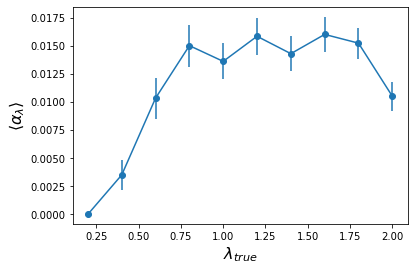

In [2]:
import numpy as np
import matplotlib.pyplot as plt

strength_list, alpha_list, alpha_sdev_list = np.genfromtxt("percent_error_L_with_N_true_n_configs_10000_N_4_sdev")

n_spectra = 1000
n_configs = 10000

plt.scatter(strength_list, alpha_list, label = f'from av. over {n_configs} configurations')
plt.errorbar(strength_list, alpha_list, alpha_sdev_list / np.sqrt(n_spectra))
plt.xlabel(r"$\lambda_{true}$", fontsize = 16)
plt.ylabel(r"$\langle\alpha_{\lambda}\rangle$", fontsize = 16)
#plt.title("% Error in $N_{guess}$ vs. $N_{true}$")

#plt.show()

#plt.savefig(f'fig_dd_average_alpha_L_errorbars_standard_error_n_spectra_{n_spectra}.png', dpi = 1000)

print(alpha_sdev_list / np.sqrt(n_spectra))
print(alpha_list)

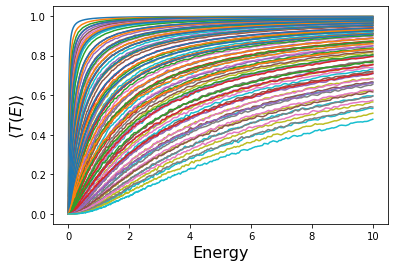

In [8]:
E = np.arange(0.001, 10, 0.005)

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

for strength in strength_list:
    for N in N_list:
        ca_T = np.genfromtxt(f'Sally_Zip/ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run')
        plt.plot(E, ca_T, label = 'N = {N}, $\lambda$ = {strength}')
        plt.xlabel('Energy', fontsize = 16)
        plt.ylabel(r'$\langle T(E)\rangle$', fontsize = 16)

plt.savefig("fig_dd_ca_N_L_res_fixed", dpi = 1000)

But what if both N and $\lambda$ are unknown? The same method is used, now with a 2 variable misfit function.

72
1; Error Function Minimumised at λ = 0.6
1; Error Function Minimumised at N = 8
2; Error Function Minimumised at λ = 0.6
2; Error Function Minimumised at N = 8
[(1, 0.2), (1, 0.4), (1, 0.6), (1, 0.8), (1, 1), (1, 1.2), (1, 1.4), (1, 1.6), (1, 1.8), (1, 2), (2, 0.2), (2, 0.4), (2, 0.6), (2, 0.8), (2, 1), (2, 1.2), (2, 1.4), (2, 1.6), (2, 1.8), (2, 2), (3, 0.2), (3, 0.4), (3, 0.6), (3, 0.8), (3, 1), (3, 1.2), (3, 1.4), (3, 1.6), (3, 1.8), (3, 2), (4, 0.2), (4, 0.4), (4, 0.6), (4, 0.8), (4, 1), (4, 1.2), (4, 1.4), (4, 1.6), (4, 1.8), (4, 2), (5, 0.2), (5, 0.4), (5, 0.6), (5, 0.8), (5, 1), (5, 1.2), (5, 1.4), (5, 1.6), (5, 1.8), (5, 2), (6, 0.2), (6, 0.4), (6, 0.6), (6, 0.8), (6, 1), (6, 1.2), (6, 1.4), (6, 1.6), (6, 1.8), (6, 2), (7, 0.2), (7, 0.4), (7, 0.6), (7, 0.8), (7, 1), (7, 1.2), (7, 1.4), (7, 1.6), (7, 1.8), (7, 2), (8, 0.2), (8, 0.4), (8, 0.6), (8, 0.8), (8, 1), (8, 1.2), (8, 1.4), (8, 1.6), (8, 1.8), (8, 2), (9, 0.2), (9, 0.4), (9, 0.6), (9, 0.8), (9, 1), (9, 1.2), (9, 1.4), 

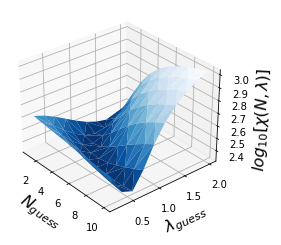

In [10]:
N_true = 5
n_configs = 10000
strength_true = 0.8

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

strengths = strength_true*np.ones(N_true)

XY_list = []
Z_list = []

x = L*np.random.rand(N_true)
T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

for N in N_list:

    for strength in strength_list: #for each guess of what N might be

        ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
        #error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
        error = sum(abs(T_E - ca_T_curve))
        #error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess
        
        XY_list.append(tuple((N, strength)))
        Z_list.append(error)

# N_guess = N_list[np.argmin(error_list)]
# strength_guess = strength_list[np.argmin(error_list)]
        
N_guess = XY_list[np.argmin(Z_list)][0]
strength_guess = XY_list[np.argmin(Z_list)][1]

print(np.argmin(Z_list))

print("1; Error Function Minimumised at λ =", strength_guess)
print("1; Error Function Minimumised at N =", N_guess)

print("2; Error Function Minimumised at λ =", strength_guess)
print("2; Error Function Minimumised at N =", N_guess)



XY_array = np.asarray(XY_list)

########

# fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_trisurf(XY_array[:, 0], XY_array[:, 1], np.log10(np.asarray(Z_list)), cmap='Blues_r')
#ax.scatter(XY_array[:, 0], XY_array[:, 1], np.asarray(Z_list), cmap='viridis')

ax.set_xlabel('$N_{guess}$', fontsize = 16)
ax.set_ylabel('$\lambda_{guess}$', fontsize = 16)
ax.set_zlabel('$log_{10}[χ (N, λ)]$', fontsize = 16)
#ax.set_facecolor('0.8')
#ax.set_zscale('log')



#ax.view_init(90, 0)

ax.view_init(30, 150)
ax.view_init(30, -40)


#plt.title(f"Error Function for Delta Potential Configuration, λ = {strength_true}, N = {N_true}")
print(XY_list, Z_list)

plt.grid(False)


# plt.contourf(XY_array, np.array(Z_list))

# plt.show()

plt.savefig(f'fig_ee_chi_N_L_{N_true}_{strength_true}.png', dpi = 1000)

In [162]:
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
E = np.arange(0.001, 10, 0.005)


n_spectra = 1000
L = 100
n_configs = 10000

strength_true = 1

beta_sdev_list = []
average_beta_list = []

for N_true in N_list:

  beta_array = np.zeros(n_spectra)

  for i in range(n_spectra):

    strengths = strength_true*np.ones(N_true)

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

    XY_list = []
    Z_list = []

    for N in N_list:

        for strength in strength_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
            #error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error = sum(abs(T_E - ca_T_curve))
            #error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess
            
            XY_list.append(tuple((N, strength)))
            Z_list.append(error)
            
    N_guess = XY_list[np.argmin(Z_list)][0]
    strength_guess = XY_list[np.argmin(Z_list)][1]

    beta_array[i] = np.sqrt((strength_guess - strength_true)**2 + (N_guess - N_true)**2)

  #print(beta_array)
  average_beta = np.sum(beta_array) / n_spectra

  average_beta_list.append(average_beta)
  beta_sdev_list.append(np.std(beta_array))

plt.scatter(N_list, average_beta_list)
plt.errorbar(N_list, average_beta_list, beta_sdev_list)

plt.xlabel(r"$N_{true}$")
plt.ylabel(r"$\beta$")

np.savetxt(f"beta_N_strength_{strength_true}_n_spectra_{n_spectra}", N_list, average_beta_list, beta_sdev_list)

plt.savefig(f"fig_beta_N_true_n_spectra_{n_spectra}.png", dpi = 1000)

KeyboardInterrupt: 

done for 1
done for 2
done for 3
done for 4
done for 5
done for 6
done for 7
done for 8
done for 9
done for 10


AttributeError: fmt has wrong shape.  [0.0, 1.971, 1.3383333333333332, 1.2785, 0.5082000000000001, 0.4415, 0.2512857142857142, 0.10075, 0.08477777777777779, 0.09530000000000001]

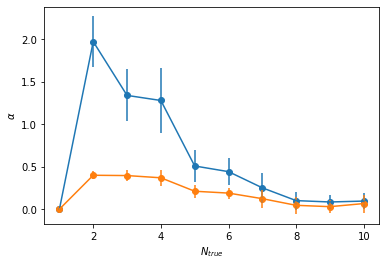

In [168]:
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
E = np.arange(0.001, 10, 0.005)


n_spectra = 1000
L = 100
n_configs = 10000

strength_true = 1

alpha_N_sdev_list = []
alpha_L_sdev_list = []

average_alpha_N_list = []
average_alpha_L_list = []

for N_true in N_list:

  alpha_N_array = np.zeros(n_spectra)
  alpha_L_array = np.zeros(n_spectra)

  for i in range(n_spectra):

    strengths = strength_true*np.ones(N_true)

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

    XY_list = []
    Z_list = []

    for N in N_list:

        for strength in strength_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
            #error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error = sum(abs(T_E - ca_T_curve))
            #error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess
            
            XY_list.append(tuple((N, strength)))
            Z_list.append(error)
            
    N_guess = XY_list[np.argmin(Z_list)][0]
    strength_guess = XY_list[np.argmin(Z_list)][1]

    alpha_N_array[i] = np.abs(N_guess - N_true) / N_true 
    alpha_L_array[i] = np.abs(strength_guess - strength_true) / strength_true 

  #print(beta_array)
  average_alpha_N = np.sum(alpha_N_array) / n_spectra
  average_alpha_L = np.sum(alpha_L_array) / n_spectra

  average_alpha_N_list.append(average_alpha_N)
  average_alpha_L_list.append(average_alpha_L)

  alpha_N_sdev_list.append(np.std(alpha_N_array))
  alpha_L_sdev_list.append(np.std(alpha_L_array))

  print("done for", N_true)

plt.scatter(N_list, average_alpha_N_list)
plt.scatter(N_list, average_alpha_L_list)
plt.errorbar(N_list, average_alpha_N_list, alpha_N_sdev_list)
plt.errorbar(N_list, average_alpha_L_list, alpha_L_sdev_list)

plt.xlabel(r"$N_{true}$")
plt.ylabel(r"$\alpha$")

np.savetxt(f"alpha_N_L_strength_{strength_true}_n_spectra_{n_spectra}", np.vstack([N_list, average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list]))

plt.savefig(f"fig_alpha_N_L_true_n_spectra_{n_spectra}.png", dpi = 1000)

In [169]:
np.savetxt(f"alpha_N_L_strength_{strength_true}_n_spectra_{n_spectra}", np.vstack([N_list, average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list]))

plt.savefig(f"fig_alpha_N_L_true_n_spectra_{n_spectra}.png", dpi = 1000)

<Figure size 432x288 with 0 Axes>

done for 0.2
done for 0.4
done for 0.6
done for 0.8
done for 1
done for 1.2
done for 1.4
done for 1.6
done for 1.8
done for 2


ValueError: 'x' and 'y' must have the same size

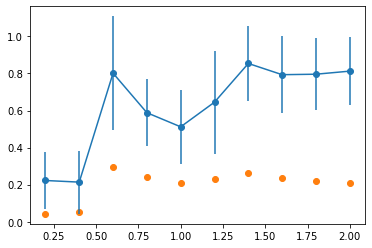

In [170]:
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
E = np.arange(0.001, 10, 0.005)


n_spectra = 1000
L = 100
n_configs = 10000

N_true = 5

alpha_N_sdev_list = []
alpha_L_sdev_list = []

average_alpha_N_list = []
average_alpha_L_list = []

for strength_true in strength_list:

  alpha_N_array = np.zeros(n_spectra)
  alpha_L_array = np.zeros(n_spectra)

  for i in range(n_spectra):

    strengths = strength_true*np.ones(N_true)

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

    XY_list = []
    Z_list = []

    for N in N_list:

        for strength in strength_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
            #error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error = sum(abs(T_E - ca_T_curve))
            #error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess
            
            XY_list.append(tuple((N, strength)))
            Z_list.append(error)
            
    N_guess = XY_list[np.argmin(Z_list)][0]
    strength_guess = XY_list[np.argmin(Z_list)][1]

    alpha_N_array[i] = np.abs(N_guess - N_true) / N_true 
    alpha_L_array[i] = np.abs(strength_guess - strength_true) / strength_true 

  #print(beta_array)
  average_alpha_N = np.sum(alpha_N_array) / n_spectra
  average_alpha_L = np.sum(alpha_L_array) / n_spectra

  average_alpha_N_list.append(average_alpha_N)
  average_alpha_L_list.append(average_alpha_L)

  alpha_N_sdev_list.append(np.std(alpha_N_array))
  alpha_L_sdev_list.append(np.std(alpha_L_array))

  print("done for", strength_true)

plt.scatter(strength_list, average_alpha_N_list)
plt.scatter(strength_list, average_alpha_L_list)
plt.errorbar(strength_list, average_alpha_N_list, alpha_N_sdev_list)
plt.errorbar(strength_list, average_alpha_L_list, alpha_L_sdev_list)

plt.xlabel(r"$\lambda_{true}$")
plt.ylabel(r"$\alphs$")

np.savetxt(f"alpha_N_L_N_{N_true}_n_spectra_{n_spectra}", strength_list, np.vstack([average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list]))

plt.savefig(f"fig_alpha_N_L__strength_true_n_spectra_{n_spectra}.png", dpi = 1000)

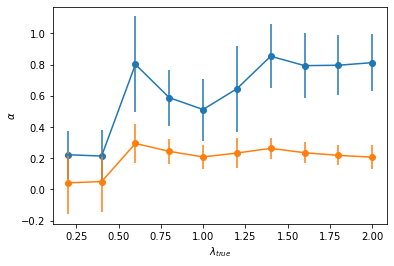

In [173]:
plt.scatter(strength_list, average_alpha_N_list)
plt.scatter(strength_list, average_alpha_L_list)
plt.errorbar(strength_list, average_alpha_N_list, alpha_N_sdev_list)
plt.errorbar(strength_list, average_alpha_L_list, alpha_L_sdev_list)

plt.xlabel(r"$\lambda_{true}$")
plt.ylabel(r"$\alpha$")

np.savetxt(f"alpha_N_L_N_{N_true}_n_spectra_{n_spectra}", np.vstack([ strength_list, average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list]))

plt.savefig(f"fig_alpha_N_L__strength_true_n_spectra_{n_spectra}.png", dpi = 1000)

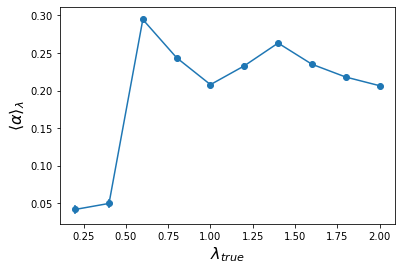

In [9]:
#at N = 5

strength_list, average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list = np.genfromtxt("alpha_N_L_N_5_n_spectra_1000")

plt.errorbar(strength_list, average_alpha_L_list, alpha_L_sdev_list/np.sqrt(n_spectra))
plt.scatter(strength_list, average_alpha_L_list)

plt.xlabel(r"$\lambda_{true}$", fontsize = 16)
plt.ylabel(r"$\langle\alpha\rangle_{\lambda}$", fontsize = 16)

plt.savefig(f"fig_dd_alpha_L_strength_true_n_spectra_{n_spectra}.png", dpi = 1000)

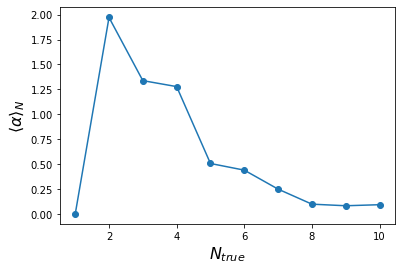

In [10]:
L = 1

N_list, average_alpha_N_list, average_alpha_L_list, alpha_N_sdev_list, alpha_L_sdev_list = np.genfromtxt("alpha_N_L_strength_1_n_spectra_1000")

plt.errorbar(N_list, average_alpha_N_list, alpha_N_sdev_list/np.sqrt(n_spectra))
plt.scatter(N_list, average_alpha_N_list)

plt.xlabel(r"$N_{true}$", fontsize = 16)
plt.ylabel(r"$\langle\alpha\rangle_{N}$", fontsize = 16)

plt.savefig(f"fig_dd_alpha_N_strength_true_n_spectra_{n_spectra}.png", dpi = 1000)

In [25]:
##runme
n_configs = 10000
L = 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

n_spectra = 1000
n_configs = 10000

alpha_list_N = [] #list of average errors of 100 spectra for each number of configurations used to calculate 
alpha_list_strength = [] 

for tuple in XY_list: #N_true

    N_true, strength_true = tuple

    strengths = strength_true*np.ones(N_true)

    alpha_array_N = np.zeros(n_spectra) #initialising an array of errors for each spectrum
    alpha_array_strength = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for i in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for tuple in XY_list: #for each guess of what N might be

            N, strength = tuple

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength}_eoin_run") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        strength_guess = XY_list[index_of_n_scatterers][1] #hence, the guess for N
        N_guess = XY_list[index_of_n_scatterers][0]

        alpha_strength = np.abs(strength_guess - strength_true) / strength_true  # how different is the guess from N_true
        alpha_N = np.abs(N_guess - N_true) / N_true

        alpha_array_N[i] = alpha_N # saving this measure
        alpha_array_strength[i] = alpha_strength # saving this measure
        
    average_alpha_N = np.sum(alpha_array_N) / n_spectra # averaging over all spectra
    average_alpha_strength = np.sum(alpha_array_strength) / n_spectra

    alpha_list_N.append(average_alpha_N) #saving this
    alpha_list_strength.append(average_alpha_strength) 

print(len(alpha_list_N), len(alpha_list_strength), len(XY_list))

#np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_N_{N_true}_n_spectra{n_spectra}", (alpha_list_N, alpha_list_strength)) #how good it is at guessing N for any strength
np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_n_spectra{n_spectra}_N_L", (alpha_list_N, alpha_list_strength))

# plt.plot(strength_list, alpha_list, label = f'from av. over {n_configs} configurations')
# plt.xlabel("N_true")
# plt.ylabel("average % error")
# plt.title("% Error in $N_{guess}$ vs. $N_{true}$")

# plt.show()

KeyboardInterrupt: 

In [26]:
np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_n_spectra{n_spectra}_N_L", (alpha_list_N, alpha_list_strength))

print(alpha_list_N)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061, 0.7255, 0.148, 0.2815, 0.3645, 0.152, 0.3445, 0.2095, 0.1555, 0.237, 0.098, 0.2326666666666667, 0.41999999999999993, 0.37633333333333335, 0.576, 0.261, 0.4983333333333333, 0.3653333333333333, 0.387, 0.541, 0.283, 0.30275, 0.78, 0.508, 0.39325, 0.48425, 0.38675, 0.5395, 0.4135, 0.51775, 0.15840000000000004, 0.1766, 0.31360000000000005, 0.5246000000000001, 0.3736, 0.34820000000000007, 0.40800000000000003, 0.34920000000000007, 0.3516, 0.411, 0.161, 0.2908333333333334, 0.20733333333333331, 0.36166666666666664, 0.3928333333333333, 0.2778333333333333, 0.3083333333333333, 0.3138333333333333, 0.27283333333333337, 0.29116666666666663, 0.23171428571428573, 0.2707142857142857, 0.289, 0.24342857142857138, 0.2601428571428571, 0.32942857142857146, 0.22499999999999995, 0.18528571428571425, 0.16242857142857142, 0.20899999999999994, 0.2885, 0.2795, 0.303375, 0.268875, 0.2565, 0.2545, 0.223625, 0.15575, 0.136125, 0.1395, 0.2964444444444444, 0.286

If the number of scatterers are known but there are two types at unknown concentration, this method can be used to determine that concentration

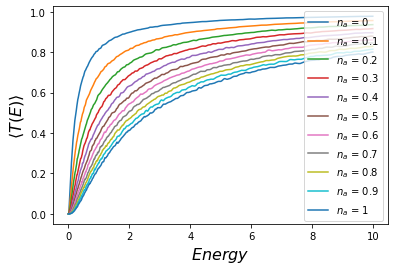

In [5]:
n_configs = 10000
N = 10
E = np.arange(0.001, 10, 0.01)

b = 0.3 #scatterer type 2
a = 1 # scatterer type 1

concentrations = [[b, b, b, b, b, b, b, b, b, b], [a, b, b, b, b, b, b, b, b, b],
[a, a, b, b, b, b, b, b, b, b], [a, a, a, b, b, b, b, b, b, b],
 [a, a, a, a, b, b, b, b, b, b], [a, a, a, a, a, b, b, b, b, b],
[a, a, a, a, a, a, b, b, b, b], [a, a, a, a, a, a, a, b, b, b],
[a, a, a, a, a, a, a, a, b, b], [a, a, a, a, a, a, a, a, a, b],
[a, a, a, a, a, a, a, a, a, a]]

concentration_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #propa/tot

for i in range(len(concentrations)):
    ca_T = np.genfromtxt(f'ca_T_N_{N}_n_configs_{n_configs}_strength_{a}_{b}_concentration_1_{concentration_values[i]}')
    plt.plot(E, ca_T, label = ("$n_{a}$ "+f"= {concentration_values[i]}"))

#plt.show(

plt.xlabel("$Energy$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)

plt.legend()

plt.savefig('fig_dd_curves_na_n_configs_10000.png', dpi = 1000)

Error Function Minimumised at n =  0.4


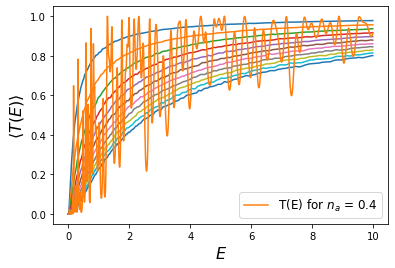

In [6]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.01)

N_true = 10

b = 0.3 #scatterer type 2
a = 1 # scatterer type 1
concentration_true = 0.4

strengths = concentrations[int(concentration_true*10)]

np.random.shuffle(strengths)

x = L*np.random.rand(N_true)
T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

for i, concentration in enumerate(concentrations): #for each guess of what N might be

    ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{a}_{b}_concentration_1_{concentration_values[i]}") # our curve for the N_guess for the number of configurations
    error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
    error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

    plt.plot(E, ca_T_curve)

plt.plot(E, T_E, label = f"T(E) for $n_a$ = {concentration_true}")

index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

concentration_guess = concentration_values[index_of_n_scatterers] #hence, the guess for N

print(r"Error Function Minimumised at n = ", concentration_guess)

plt.xlabel("$E$", fontsize = 16)
plt.ylabel(r"$\langle T(E) \rangle$", fontsize = 16)

plt.legend(fontsize = 12, loc='lower right')

plt.savefig(f"fig_ee_ca_n_with_T_E.png", dpi = 1000)
plt.show()

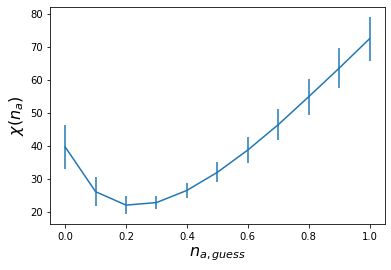

In [170]:
# index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

# N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

# print("Error Function Minimumised at N = ", N_guess)

# plt.show()

concentration_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #propa/tot

error_configs = 100

error_list_list = []

for i in range(error_configs):

    x = L*np.random.rand(N_true)
    T_E = trans_delta_L(x, strengths, E)

    error_list = []

    for i, concentration in enumerate(concentrations): #for each guess of what N might be

        ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{a}_{b}_concentration_1_{concentration_values[i]}") # our curve for the N_guess for the number of configurations
        error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
        error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

    error_list_list.append(error_list)

min_error_index = np.argmin(error_list)

standard_deviations = []

for N in range(len(concentration_values)):
    errors_for_this_N = []
    for i in range(error_configs):
        error_value = error_list_list[i][N]
        errors_for_this_N.append(error_value)
    standard_deviations.append(np.std(errors_for_this_N))

#np.savetxt(f'standard_deviations_chi_N_{N}_lambda{strength_true}_error_configs_{error_configs}', standard_deviations)

standard_error = standard_deviations #/ np.sqrt(error_configs)

plt.errorbar(concentration_values, error_list, standard_error)
plt.xlabel(r"$n_{a, guess}$", fontsize = 16)
plt.ylabel("$χ(n_{a})$", fontsize = 16)

plt.savefig('fig_dd_chi_n_sdev_errorbars.png', dpi = 1000)

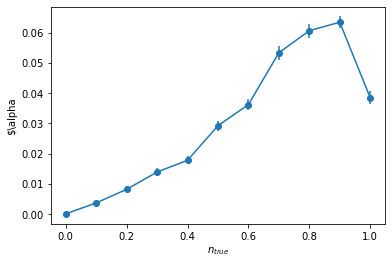

In [ ]:
n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.01)

N_true = 10

b = 0.3 #scatterer type 2
a = 1 # scatterer type 1

n_spectra = 1000

alpha_list = [] #list of average errors of 100 spectra for each number of configurations used to calculate 
alpha_sdev_list = []

for i, concentration_true in enumerate(concentrations): #N_true
    concentration_value = concentration_values[i]
    strengths = concentration_true

    np.random.shuffle(strengths)

    alpha_array = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for index in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for i, concentration in enumerate(concentrations): #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{a}_{b}_concentration_1_{concentration_values[i]}") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        concentration_guess = concentration_values[index_of_n_scatterers] #hence, the guess for N

        alpha = np.abs(concentration_guess - concentration_value)  # how different is the guess from N_true

        alpha_array[index] = alpha # saving this measure

    #print("here")    
    average_alpha = np.sum(alpha_array) / n_spectra # averaging over all spectra
    sdev_alpha = np.std(alpha_array)

    alpha_list.append(average_alpha) #saving this
    alpha_sdev_list.append(sdev_alpha)

np.savetxt(f"percent_error_with_N_true_n_configs_{n_configs}_N_{N_true}_n_spectra_{n_spectra}_concentrations", (concentration_values, alpha_list, alpha_sdev_list)) #how good it is at guessing N for any strength

plt.scatter(concentration_values, alpha_list)
plt.errorbar(concentration_values, alpha_list, alpha_sdev_list/np.sqrt(n_spectra))

plt.xlabel(r"$n_{true}$")
plt.ylabel(r"$\langle\alpha\rangle$")

#np.savetxt(f"alpha_n_N_{N_true}_n_spectra_{n_spectra}", strength_list, average_beta_list, beta_sdev_list)

plt.savefig(f"fig_cc_alpha_n_true_n_spectra_{n_spectra}.png", dpi = 1000)

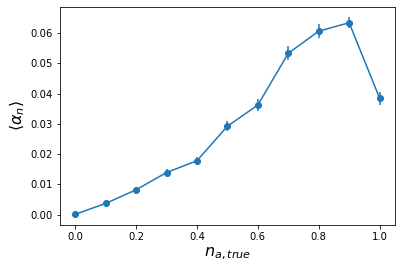

In [171]:
concentration_values, alpha_list, alpha_sdev_list = np.genfromtxt(f"percent_error_with_N_true_n_configs_10000_N_10_n_spectra_1000_concentrations")

plt.scatter(concentration_values, alpha_list)
plt.errorbar(concentration_values, alpha_list, alpha_sdev_list/np.sqrt(n_spectra))

plt.xlabel(r"$n_{a, true}$", fontsize = 16)
plt.ylabel(r"$\langle\alpha_{n}\rangle$", fontsize = 16)

#np.savetxt(f"alpha_n_N_{N_true}_n_spectra_{n_spectra}", strength_list, average_beta_list, beta_sdev_list)

plt.savefig(f"fig_dd_alpha_n_true_n_spectra_{n_spectra}.png", dpi = 1000)

ValueError: x and y must have same first dimension, but have shapes (10,) and (89,)

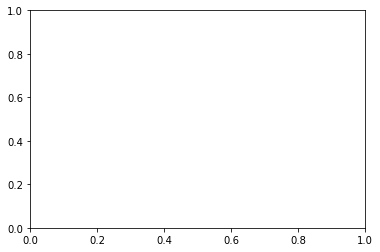

In [46]:
alpha_N, alpha_L = np.genfromtxt("percent_error_with_N_true_n_configs_10000_n_spectra1000_N_L")

plt.plot(N_list, alpha_N)
plt.plot(strength_list, alpha_L)

In [ ]:
alpha_N, alpha_L = np.genfromtxt("percent_error_with_N_true_n_configs_10000_n_spectra1000_N_L")

plt.plot(N_list, alpha_N)
plt.plot(strength_list, alpha_L)

In [ ]:
N_true = 4
n_spectra = 100
n_configs = 10000
strength_true = 1

alpha_list_N, alpha_list_strength = np.genfromtxt(f'percent_error_with_N_true_n_configs_{n_configs}_N_{N_true}')

#plt.plot(strength_list, alpha_list_strength)
plt.plot(N_list, alpha_list_N)

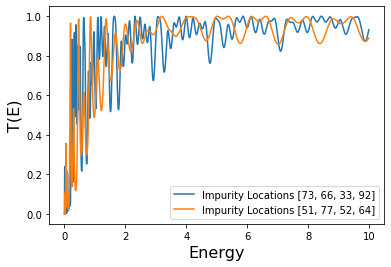

In [172]:
N = 4
strength = 0.6
strengths = strength*np.ones(N)


x_1 = [73, 66, 33, 92]

T_E_1 = trans_delta_L(x_1, strengths, E) #generating a random spectrum

x_2 = [51, 77, 52, 64]

T_E_2 = trans_delta_L(x_2, strengths, E) #generating a random spectrum

plt.plot(E, T_E_1, label = f"Impurity Locations {x_1}")
plt.plot(E, T_E_2, label = f"Impurity Locations {x_2}")

plt.xlabel("Energy", fontsize = 16)
plt.ylabel("T(E)", fontsize = 16)

plt.legend()

plt.savefig("dd_fig_T_E_N_4_strength_06", dpi = 1000)

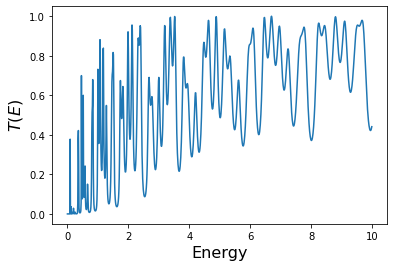

In [184]:
N = 4
strengths = [1.6, 1.6, 1.6, 1.6]


x_1 = [20, 40, 48, 78]

T_E_1 = trans_delta_L(x_1, strengths, E) #generating a random spectrum


plt.plot(E, T_E_1, label = f"Impurity Locations {x_1}")

plt.xlabel("Energy", fontsize = 16)
plt.ylabel("$T(E)$", fontsize = 16)

#plt.legend()

plt.savefig("fig_dd_T_E_N_4_for_diagram_true_energy", dpi = 1000)

In [4]:
#n_configs = 10000
L= 100
E = np.arange(0.001, 10, 0.005)

strength_true = 1
N_true = 4

N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strength_list = [1]
n_configs_list = [1, 3, 10, 25, 50, 100, 1000, 2000, 5000, 10000]

n_spectra = 1000
n_configs = 10000

alpha_list = [] #list of average errors of 100 spectra for each number of configurations used to calculate 
alpha_sdev_list = []

for n_configs in n_configs_list: #N_true

    strengths = strength_true*np.ones(N_true)

    alpha_array = np.zeros(n_spectra) #initialising an array of errors for each spectrum

    error_list_list = []

    for i in range(n_spectra):

        x = L*np.random.rand(N_true)
        T_E = trans_delta_L(x, strengths, E) #generating a random spectrum

        error_list = [] #initialising list of errors, i.e, how wrong each of the guesses for N is

        for N in N_list: #for each guess of what N might be

            ca_T_curve = np.genfromtxt(f"ca_T_N_{N}_n_configs_{n_configs}_strength_{strength_true}_eoin_run") # our curve for the N_guess for the number of configurations
            error = sum((T_E - ca_T_curve)**2) # how big the difference is between that curve and the random spectrum
            error_list.append(error) # collecting these differences to find the minimum, the corresponding N value will be our guess

        index_of_n_scatterers = np.argmin(error_list) #index of N which minimises difference between the spectrum and the ca curve

        N_guess = N_list[index_of_n_scatterers] #hence, the guess for N

        alpha = np.abs(N_guess - N_true) / N_true  # how different is the guess from N_true

        alpha_array[i] = alpha # saving this measure
        
    average_alpha = np.sum(alpha_array) / n_spectra # averaging over all spectra

    sdev_alpha = np.std(alpha_array)
    
    alpha_sdev_list.append(sdev_alpha)
    alpha_list.append(average_alpha) #saving this

    print("done for ", n_configs)

np.savetxt(f"alpha_n_configs_N_{N_true}_strength_{strength_true}_stdev_true_true_nspectra_{n_spectra}", (N_list, alpha_list, alpha_sdev_list)) #how good it is at guessing N for any strength

done for  1
done for  3
done for  10
done for  25
done for  50
done for  100
done for  1000
done for  2000
done for  5000
done for  10000


[0.00497166 0.00426626 0.00419803 0.00356433 0.00336303 0.00295935
 0.00284287 0.00294869 0.0028395  0.00273747]


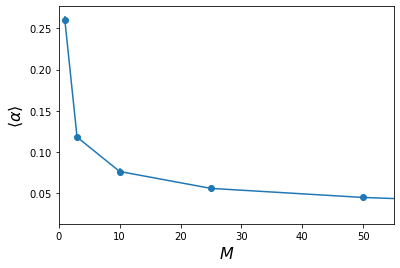

In [6]:
N_list, alpha_list, alpha_sdev_list = np.genfromtxt("alpha_n_configs_N_4_strength_1_stdev_true_true_nspectra_1000")
n_configs_list = [1, 3, 10, 25, 50, 100, 1000, 2000, 5000, 10000]


n_spectra = 1000

plt.scatter(n_configs_list, alpha_list)
plt.errorbar(n_configs_list, alpha_list, alpha_sdev_list/np.sqrt(n_spectra))

plt.xlim(0, 55)
#plt.ylim(0, 0.04)

print(alpha_sdev_list/np.sqrt(n_spectra))

plt.xlabel("$M$", fontsize = 16)
plt.ylabel(r"$\langle\alpha\rangle$", fontsize = 16)

plt.savefig("dd_alpha_m_small_standar_error", dpi = 1000)

[0.00497166 0.00426626 0.00419803 0.00356433 0.00336303 0.00295935
 0.00284287 0.00294869 0.0028395  0.00273747]


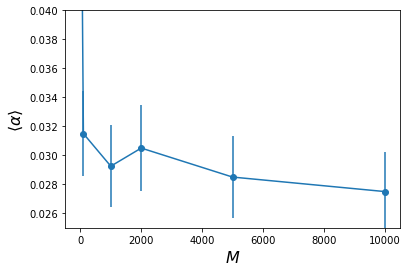

In [7]:
plt.scatter(n_configs_list, alpha_list)
plt.errorbar(n_configs_list, alpha_list, alpha_sdev_list/np.sqrt(n_spectra))

#plt.xlim(0, 55)
plt.ylim(0.025, 0.04)

print(alpha_sdev_list/np.sqrt(n_spectra))

plt.xlabel("$M$", fontsize = 16)
plt.ylabel(r"$\langle\alpha\rangle$", fontsize = 16)

plt.savefig("dd_alpha_m_big_standar_error", dpi = 1000)